In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [5]:
df =  pd.read_csv('MainData.csv', encoding='cp949', header=0)

In [4]:
df['계약일'] = pd.to_datetime(df['계약일'], format = '%Y-%m-%d')
df['연도'] = df['계약일'].dt.year
df = df.drop(['법정동명'], axis = 1)     #일단 종류가 많은 법정동명 제외
#df = df.loc[df['연도']>=2021]
df = df.drop(['연도'], axis = 1)


df = df.dropna()

KeyError: "['법정동명'] not found in axis"

In [6]:
x = df[['층','임대면적','보증금','건축년도','경제활동인구','기준금리','정책성향','아파트매매실거래지수','회사채수익률','소비자물가지수','통화량','광공업지수']]

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_scale = sc.fit_transform(x)

In [11]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

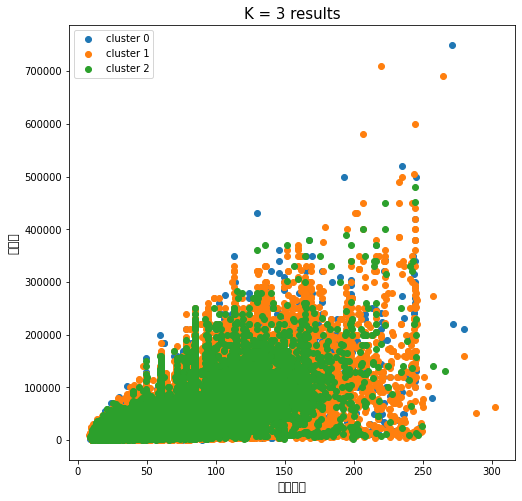

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i,'임대면적'], df.loc[df['cluster'] == i, '보증금'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('임대면적', size = 12)
plt.ylabel('보증금', size = 12)
plt.show()

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

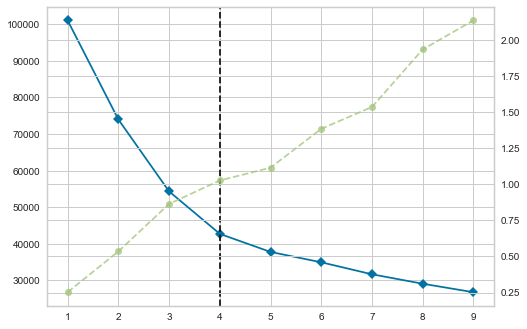

In [13]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(data_scale)

In [14]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

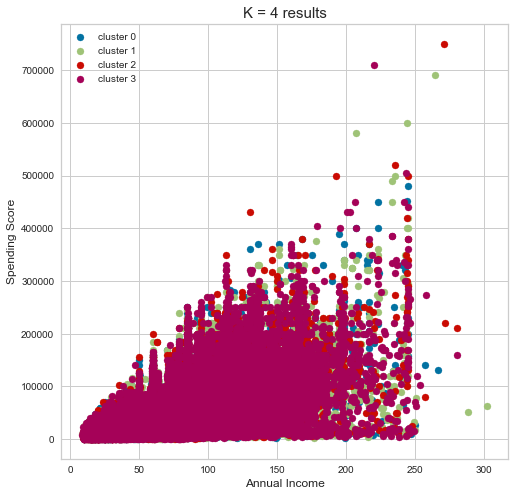

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i,'임대면적'], df.loc[df['cluster'] == i, '보증금'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

In [16]:
df.to_csv('kmeans2.csv',encoding='cp949')